#### This is a coding task from Codility of UB during its hiring process.

# Practice question

In [21]:
# you can write to stdout for debugging purposes, e.g.
# print("this is a debug message")

def solution(A):
    # Implement your solution here
    seen = {num for num in A if num > 0}
    smallest_positive = 1
    while smallest_positive in seen:
        smallest_positive += 1
    return smallest_positive

# Task 1

KMeans Clustering and PCA Model task
Vectors - Doc2vec is an NLP tool for representing documents as a vector and is a generalizing of the word2vec method. In order to understand doc2vec, it is advisable to understand word2vec approach.

In [22]:
from sklearn.cluster import KMeans
from sklearn.metrics import completeness_score, v_measure_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import sklearn.metrics.cluster as metrics
import pandas as pd
import pickle

# You can access the `data` folder by uncommenting the following command
data = pickle.load(open("C:/Users/Shai/Documents/GitHub/python-projects/data/documents.p", "rb"))
id_list = list(data['id'])
vectors_list = list(data['vectors'])

# Create the DataFrame
df = pd.DataFrame({'id': id_list, 'group': data['group'], 'vectors': vectors_list})

In [23]:
data2 = pickle.load(open("C:/Users/Shai/Documents/GitHub/python-projects/data/subset_documents.p", "rb"))
data2.keys()

dict_keys(['id', 'group', 'vectors'])

A pickle file is a serialized object in Python. It allows you to serialize and deserialize Python object structures so that they can be easily stored and retrieved from disk or transmitted over a network. The name "pickle" is derived from the act of preserving foods in pickling jars.

In [24]:
data2["vectors"][0]

array([-0.14574142,  0.46315575, -0.10625485,  0.733481  ,  0.6023287 ,
       -0.44891137,  0.64147145, -0.14828205, -0.0990378 ,  0.30485964,
       -0.05608635,  0.15949585, -0.1698478 ,  0.9816802 ,  0.43330085,
        0.79539174, -0.51724976, -0.42243773,  0.16527706, -0.14684199,
       -1.2171087 ,  1.1559806 ,  0.3781749 , -0.8556077 ,  0.69194835,
       -0.13551025, -0.07512576,  0.47471246,  0.27141082,  1.0357225 ,
       -0.9927616 , -1.0014585 , -0.10621797,  0.2610809 ,  0.29389668,
        0.06337959,  0.04291024, -0.06738739, -1.0249693 , -0.63223094,
        0.39483625,  0.97532755, -1.3221105 ,  0.5347823 , -0.7582984 ,
       -0.11200616, -0.73637694, -0.23228577,  0.39934316, -0.65675914,
        0.39203444,  0.30745104, -0.04639585, -1.2636211 , -0.14386624,
        1.0021389 , -0.5675943 , -0.13403913,  0.13440858,  0.07355104,
        0.04141239,  0.5288291 ,  0.3355467 ,  0.3822725 , -1.3230875 ,
       -0.08137811, -0.02960619,  0.6184817 ,  0.26183027, -0.36

In [25]:
data.keys()

dict_keys(['id', 'group', 'vectors'])

The data is a dictionary with list of list(vectors column). I converted first the dictionary to dataframe then broken down the vectors column to several columns.
Disclaimer: I'm about to search more about document vectors and currently not sure about creating several columns  if it is correct. However, since the problem ask for dimension reduction I guess my steps are correct.

In [26]:
data["vectors"][5]

array([ 8.44363589e-03,  3.56870353e-01,  3.19745503e-02,  6.07463084e-02,
        1.07652056e+00,  5.24650693e-01,  1.37139678e-01,  2.12919906e-01,
       -6.02914631e-01,  6.61217391e-01, -2.93063879e-01,  1.39732748e-01,
        1.07560587e+00, -3.21185589e-01, -4.72967058e-01, -8.43851686e-01,
       -4.94009703e-02, -3.14426839e-01, -4.97963607e-01,  5.47657013e-01,
        1.98529139e-01,  1.33056611e-01,  7.39319175e-02,  6.49731815e-01,
       -1.93746522e-01,  8.91574193e-03,  4.12744015e-01,  3.69403660e-02,
       -1.06031454e+00, -1.45086989e-01, -3.20170850e-01, -1.45254612e-01,
        2.34680057e-01, -2.23848686e-01,  9.01854336e-02, -4.52330470e-01,
        5.75464725e-01, -6.32750627e-04, -5.26223004e-01,  4.37901884e-01,
        1.25634778e+00, -7.87343264e-01, -6.07092798e-01,  1.29482615e+00,
       -5.86616337e-01,  3.41114163e-01, -2.39783272e-01,  6.78319931e-01,
        1.75758582e-02,  8.46633852e-01,  1.38330996e-01, -2.33790413e-01,
       -5.16649246e-01, -

In [27]:
max_vectors = max(len(vectors) for vectors in df['vectors'])

# Create separate columns for each vector
for i in range(1, max_vectors + 1):
    df[f'vector {i}'] = [vectors[i - 1] if i <= len(vectors) else '' for vectors in df['vectors']]

# Drop the original 'vectors' column
df.drop('vectors', axis=1, inplace=True)

C:\Users\Shai\AppData\Local\Temp\ipykernel_23316\1108778784.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'vector {i}'] = [vectors[i - 1] if i <= len(vectors) else '' for vectors in df['vectors']]
C:\Users\Shai\AppData\Local\Temp\ipykernel_23316\1108778784.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'vector {i}'] = [vectors[i - 1] if i <= len(vectors) else '' for vectors in df['vectors']]


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11314 entries, 0 to 11313
Columns: 102 entries, id to vector 100
dtypes: float32(100), int64(2)
memory usage: 4.5 MB


In [29]:
df.describe()

,id,group,vector 1,vector 2,vector 3,vector 4,vector 5,vector 6,vector 7,vector 8,...,vector 91,vector 92,vector 93,vector 94,vector 95,vector 96,vector 97,vector 98,vector 99,vector 100
count,11314.000000,11314.000000,11314.000000,11314.000000,11314.000000,11314.000000,11314.000000,11314.000000,11314.000000,11314.000000,...,11314.000000,11314.000000,11314.000000,11314.000000,11314.000000,11314.000000,11314.000000,11314.000000,11314.000000,11314.000000
mean,5656.500000,4.181280,-0.321636,0.301673,0.083632,0.241559,0.798929,-0.104662,-0.149178,-0.255456,...,0.092576,0.031595,-0.193577,-0.217789,0.062639,-0.029448,0.119136,-0.229453,0.111878,-0.163037
std,3266.214807,2.320726,0.506794,0.519805,0.520305,0.488699,0.518564,0.512792,0.520720,0.509593,...,0.518041,0.508797,0.499592,0.533306,0.503579,0.498246,0.526982,0.506848,0.511385,0.519391
min,0.000000,0.000000,-2.528741,-1.499457,-1.811927,-1.616577,-0.933594,-2.505020,-2.510826,-2.625381,...,-1.968130,-2.043764,-2.206287,-2.633838,-1.915058,-2.375007,-2.428777,-2.272110,-2.045162,-2.621439
25%,2828.250000,3.000000,-0.643655,-0.055237,-0.260882,-0.068441,0.437587,-0.428142,-0.475438,-0.572622,...,-0.240691,-0.294581,-0.506629,-0.538087,-0.267218,-0.349395,-0.235406,-0.557348,-0.217857,-0.489796
50%,5656.500000,4.000000,-0.307081,0.276634,0.069537,0.241372,0.757585,-0.087989,-0.139570,-0.248151,...,0.093140,0.029161,-0.182161,-0.186509,0.060829,-0.017774,0.097121,-0.231614,0.115317,-0.155268
75%,8484.750000,6.000000,0.012820,0.625450,0.414994,0.564886,1.126033,0.234357,0.183598,0.067314,...,0.424691,0.353179,0.128947,0.138906,0.379877,0.302562,0.450609,0.095533,0.444319,0.173220
max,11313.000000,9.000000,1.558849,2.506629,2.297334,2.243090,3.494129,1.848999,2.065200,1.818946,...,2.214491,2.310660,2.007367,2.210915,2.284685,2.101753,2.383249,2.258639,2.602840,2.241712


## Modeling

In [30]:
import matplotlib.pyplot as plt

def elbow_method(df):
    # Remove the 'group' and 'id' columns from the DataFrame
    features = df.drop(columns=['group', 'id'])

    # Standardize the features
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(features)

    # Calculate the within-cluster sum of squares (WCSS) for different values of K
    wcss = []
    for k in range(1, 40):
        kmeans = KMeans(n_clusters=k, random_state=2, tol=0.05, max_iter=50)
        kmeans.fit(scaled_features)
        wcss.append(kmeans.inertia_)

    # Plot the WCSS against the number of clusters
    plt.plot(range(1, 40), wcss, marker='o', linestyle='-')
    plt.xlabel('Number of Clusters (K)')
    plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
    plt.title('Elbow Method for Optimal K')
    plt.xticks(range(1, 40))
    plt.grid(True)
    plt.show()


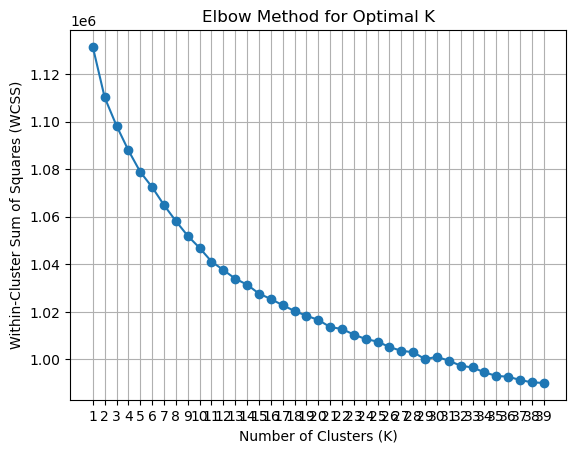

In [31]:
elbow_method(df)

In [49]:
def cluster_articles(df):
    # Remove the 'group' and 'id' columns from the DataFrame
    features = df.drop(columns=['group', 'id'])

    # Standardize the features
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(features)

    # K-means clustering on standardized original data
    kmeans = KMeans(n_clusters=10, random_state=2, tol=0.05, max_iter=50)
    kmeans.fit(scaled_features)
    df['cluster'] = kmeans.labels_

    # Evaluation on standardized original data
    predicted_labels = df['cluster']
    true_labels = df["group"]
    nobs_100 = df['cluster'].value_counts().sort_index().tolist()
    cs_100 = completeness_score(true_labels, predicted_labels)
    v_100 = v_measure_score(true_labels, predicted_labels)
    
    # Apply PCA for dimensionality reduction on standardized data
    pca = PCA(n_components=10, random_state=2)
    data_pca = pca.fit_transform(scaled_features)
    
    # Get the explained variance ratio for each principal component
    explained_variance_ratio = pca.explained_variance_ratio_

    # Plot the cumulative explained variance ratio
    plt.figure(figsize=(8, 6))
    cumulative_variance = np.cumsum(explained_variance_ratio)
    plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='-')
    plt.xlabel('Number of Components')
    plt.ylabel('Cumulative Explained Variance Ratio')
    plt.title('Cumulative Explained Variance Ratio')
    plt.grid(True)
    plt.show()

    # Plot the components using a heatmap
    components = pca.components_
    components_df = pd.DataFrame(components, columns=features.columns)
    plt.figure(figsize=(10, 8))
    sns.heatmap(components_df, cmap='viridis', annot=True, fmt=".2f")
    plt.xlabel('Original Features')
    plt.ylabel('Principal Components')
    plt.title('Principal Components vs. Original Features')
    plt.show()
    
    # K-means clustering on reduced data
    kmeans_pca = KMeans(n_clusters=10, random_state=2, tol=0.05, max_iter=50)
    predicted_labels_pca = kmeans_pca.fit_predict(data_pca)
    
    # Add cluster labels to DataFrame
    df['cluster2'] = predicted_labels_pca
    predicted_labels_pca = df['cluster2']
    true_labels = df["group"]
    cs_10 = completeness_score(true_labels, predicted_labels_pca)
    v_10 = v_measure_score(true_labels, predicted_labels_pca)
    
    pca_explained = pca.explained_variance_[0]
    nobs_10 = df['cluster2'].value_counts().sort_index().tolist()
    
    result = {
        'nobs_100': nobs_100,
        'nobs_10': nobs_10,
        'pca_explained': pca_explained,
        'cs_100': cs_100,
        'cs_10': cs_10,
        'v_100': v_100,
        'v_10': v_10,
        'explained_variance_ratio': explained_variance_ratio,
        'components': components
    }
    return result

def plot_explained_variance_ratio(explained_variance_ratio):
    # Calculate cumulative explained variance ratio
    cumulative_variance = np.cumsum(explained_variance_ratio)

    # Plot the cumulative explained variance ratio
    plt.figure(figsize=(8, 6))
    plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='-')
    plt.xlabel('Number of Components')
    plt.ylabel('Cumulative Explained Variance Ratio')
    plt.title('Cumulative Explained Variance Ratio')
    plt.grid(True)
    plt.show()

def plot_principal_components(components, feature_names):
    # Create a DataFrame for components with feature names as columns
    components_df = pd.DataFrame(components, columns=feature_names)

    # Plot the components using a heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(components_df, cmap='viridis', annot=True, fmt=".2f")
    plt.xlabel('Original Features')
    plt.ylabel('Principal Components')
    plt.title('Principal Components vs. Original Features')
    plt.show()

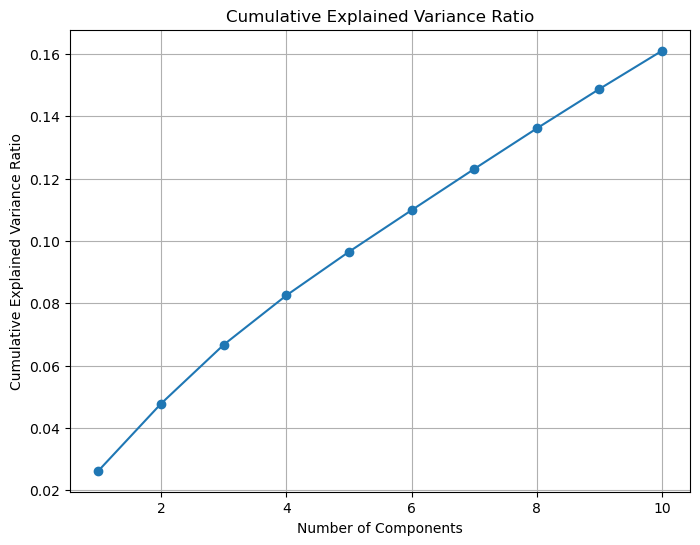

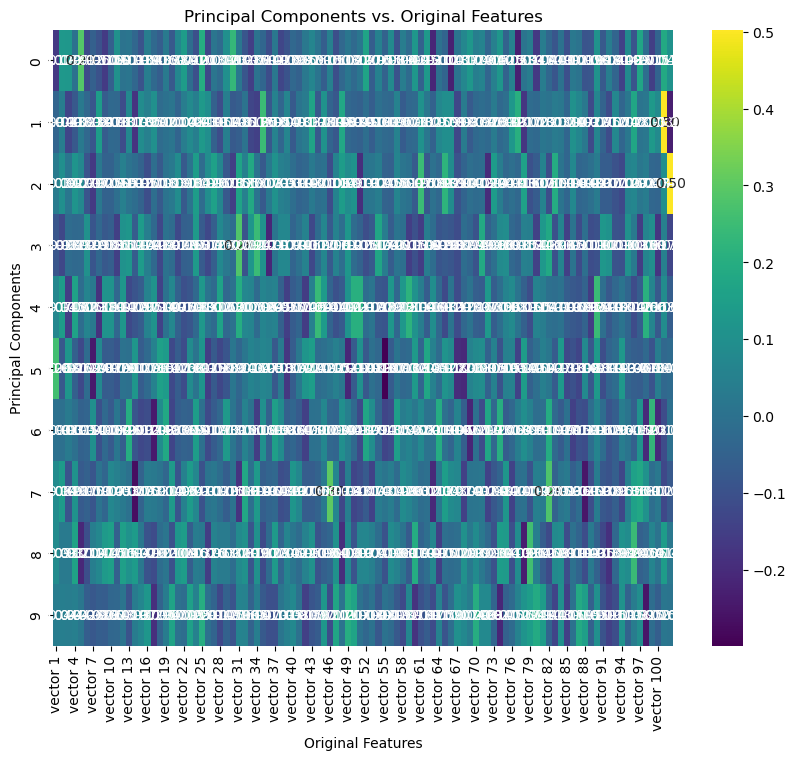

{'nobs_100': [2376, 567, 1160, 590, 983, 1204, 1259, 610, 1108, 1457],
 'nobs_10': [734, 1910, 1370, 1159, 1258, 1023, 1100, 953, 1215, 592],
 'pca_explained': 2.6805204875442206,
 'cs_100': 0.6030283055553155,
 'cs_10': 0.5428870738053853,
 'v_100': 0.6133849917562822,
 'v_10': 0.5580521299134696,
 'explained_variance_ratio': array([0.02627729, 0.02152665, 0.01888224, 0.01582181, 0.01399669,
        0.0133427 , 0.01322466, 0.01301849, 0.01265339, 0.01225459]),
 'components': array([[-0.16696544,  0.13013361,  0.12629849, ..., -0.0429292 ,
          0.18543518,  0.10734471],
        [-0.04028131,  0.03817693, -0.13307807, ...,  0.08282064,
          0.50261743, -0.23001634],
        [ 0.0316749 ,  0.09596694,  0.01729102, ..., -0.03960276,
          0.09278156,  0.50266565],
        ...,
        [ 0.08457456,  0.13911893, -0.08975347, ...,  0.02316674,
         -0.1243261 , -0.077797  ],
        [ 0.08590155,  0.02715532,  0.02956852, ...,  0.00809654,
          0.1407334 ,  0.02234337

In [50]:
#Below is the required answers for this task
cluster_articles(df)

Currently the scores are quite low -this is before standardization of values
Without PCA have generated better results

Cumulative Explained Variance Ratio:

Evaluate the cumulative explained variance ratio plot to understand how much variance in the data is explained by the principal components.
Look for the point where the curve starts to level off. This point indicates the number of principal components needed to capture most of the variance in the data.
If there is an "elbow" in the plot, it suggests that adding more components beyond that point does not significantly increase the explained variance.
Principal Components Visualization:

Evaluate the heatmap of principal components to understand the relationships between original features and principal components.
Look for patterns in the heatmap. Darker cells indicate higher absolute values, suggesting stronger relationships between features and components.
Identify which original features contribute most to each principal component. Features with high absolute values in the corresponding component row are more influential.

# pending evaluation of the model

In [14]:
df.head()

,id,group,vector 1,vector 2,vector 3,vector 4,vector 5,vector 6,vector 7,vector 8,...,vector 93,vector 94,vector 95,vector 96,vector 97,vector 98,vector 99,vector 100,cluster,cluster2
0,0,2,-0.782214,0.849030,-0.623739,1.137383,1.377935,-0.804760,-0.859999,-0.184784,...,-0.451734,-0.676049,0.664595,0.422658,-0.231945,-0.773502,-0.976207,-0.076483,0,5
1,1,3,-0.954391,0.222942,0.179708,0.712141,2.085975,-0.590047,-0.520407,-0.448135,...,-0.172711,-0.197387,-1.088920,0.801701,0.413218,-1.065198,-0.253530,0.246094,3,3
2,2,3,-0.200074,-0.542337,0.322167,0.431917,0.719309,-0.851156,0.118463,0.372747,...,-0.127078,0.242511,-0.414789,0.297782,0.688941,-0.279972,-0.487775,-0.406851,3,3
3,3,3,-0.826979,0.279338,0.290839,0.189559,1.306154,0.035058,-0.086363,-0.524517,...,-0.880408,0.527594,-0.154881,-0.218610,0.584203,0.491066,-0.536717,-0.258770,6,6
4,4,1,-0.581692,0.147377,-0.347732,0.761430,0.499861,0.668978,-0.039145,-1.212050,...,-0.859225,0.646671,0.300072,0.346214,-0.283779,-0.500032,0.444997,-0.560702,9,7


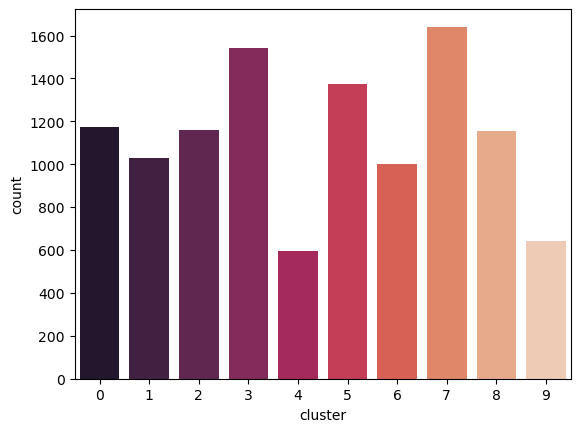

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='cluster', palette='rocket')
plt.show()

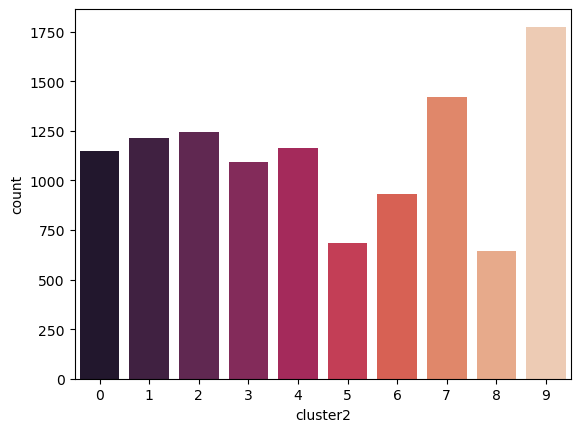

In [16]:
sns.countplot(data=df, x='cluster2', palette='rocket')
plt.show()